In [14]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [15]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [17]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [18]:
crime.shape

(50, 5)

In [19]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [20]:
crime[crime.duplicated(keep= False)]

,state,Murder,Assault,UrbanPop,Rape


In [21]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


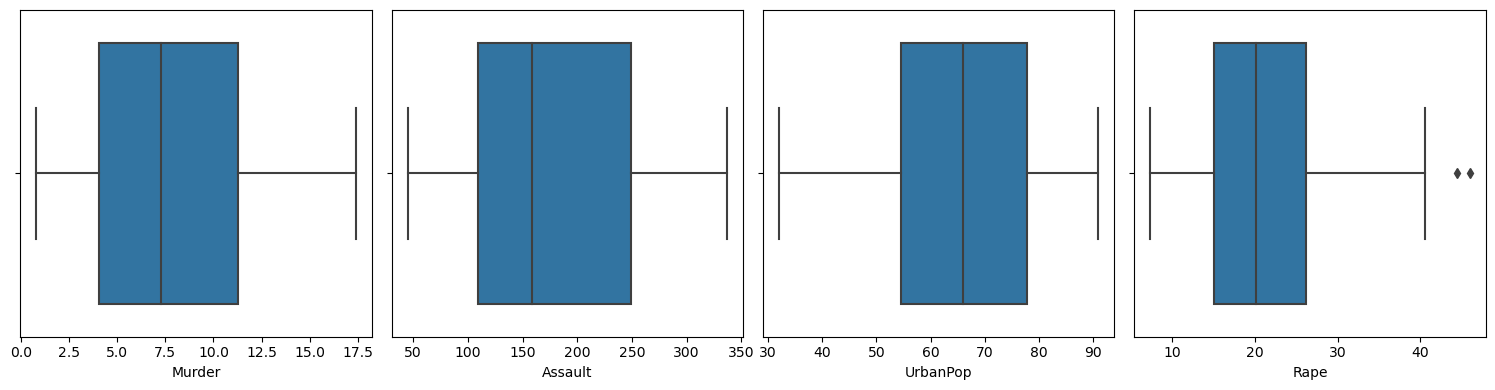

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
sns.boxplot(crime.Murder, ax=ax[0])
sns.boxplot(crime.Assault, ax=ax[1])
sns.boxplot(crime.UrbanPop, ax=ax[2])
sns.boxplot(crime.Rape, ax=ax[3])
plt.tight_layout()
plt.show() 

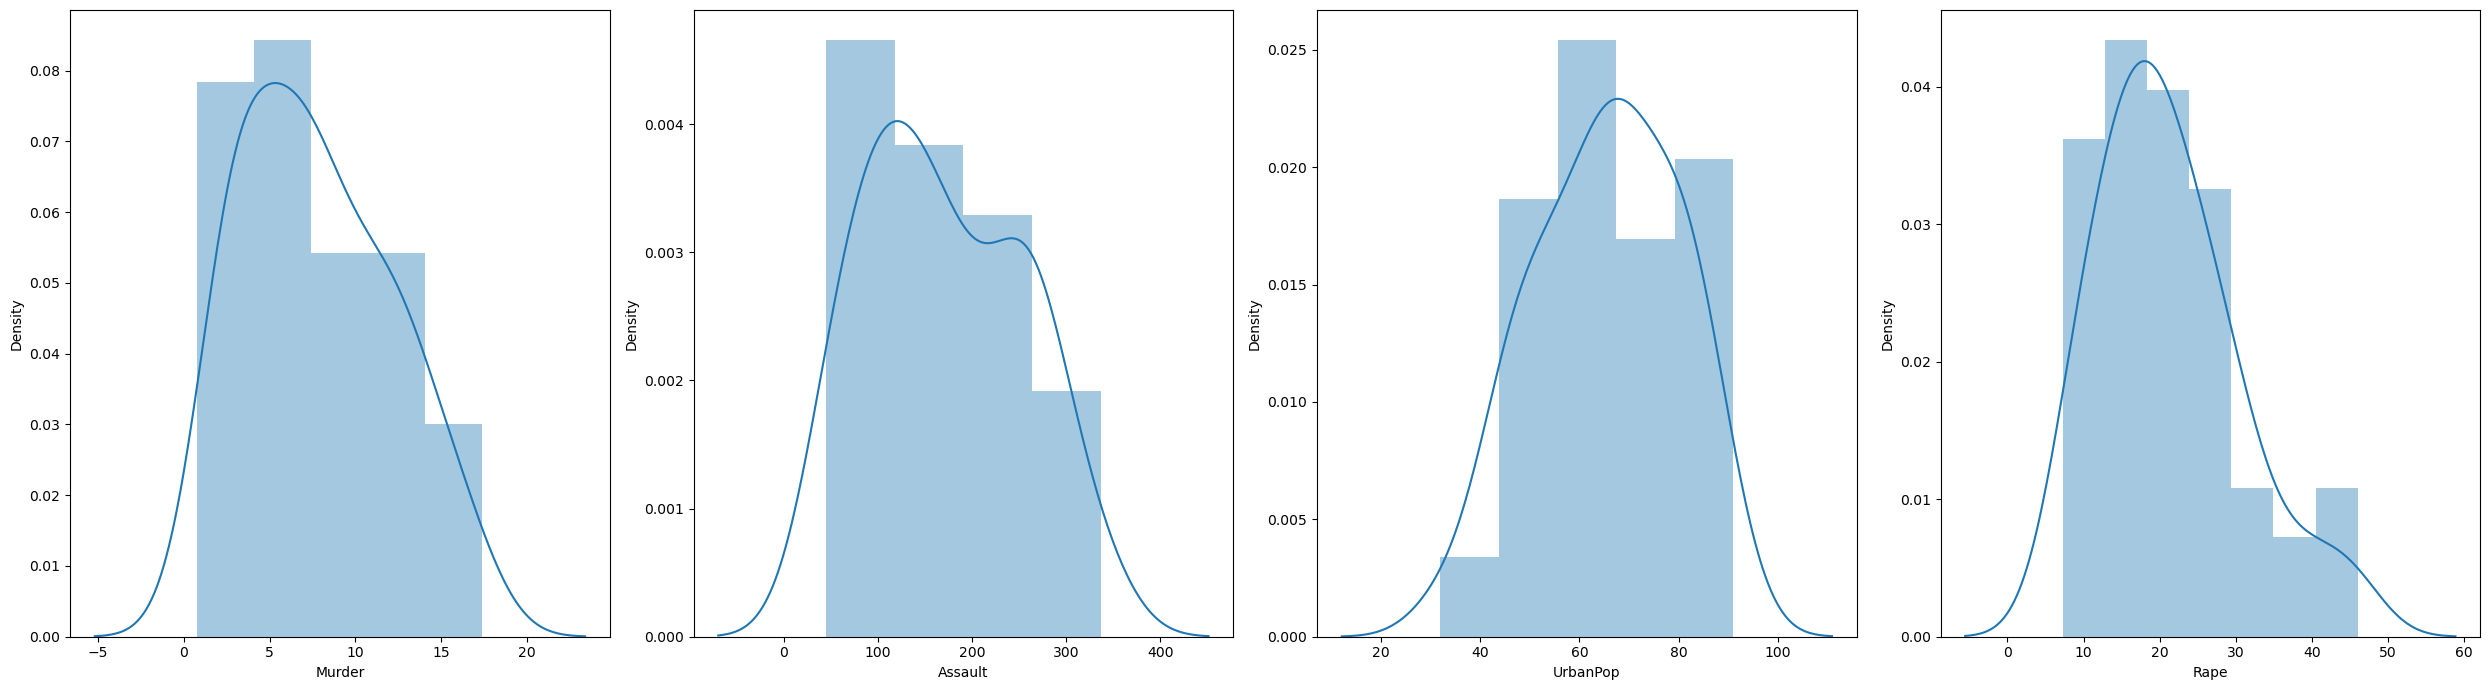

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(25,7))
sns.distplot(crime.Murder, ax=ax[0])
sns.distplot(crime.Assault, ax=ax[1])
sns.distplot(crime.UrbanPop, ax=ax[2])
sns.distplot(crime.Rape, ax=ax[3])
plt.tight_layout()
plt.show() 

In [24]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
df_norm = norm_func(crime.iloc[:,1:])

In [27]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


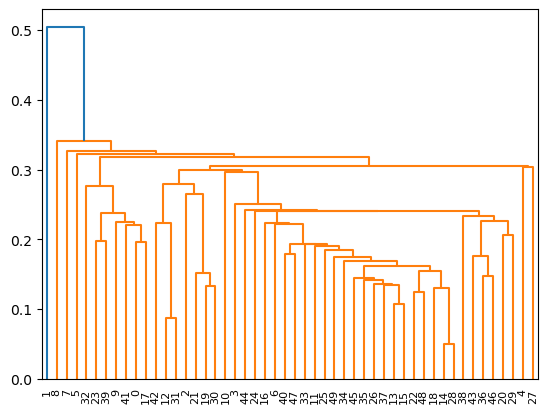

In [28]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [29]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [30]:
y_hc1 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [31]:
crime['cluster'] = y_hc1

In [32]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.742857,168.877551,65.897959,20.757143
1,1,10.000000,263.000000,48.000000,44.500000


In [33]:
for i in range(2):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Alabama | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming
Total Members: 49

cluster 1
The Members: Alaska
Total Members: 1



In [34]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [35]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

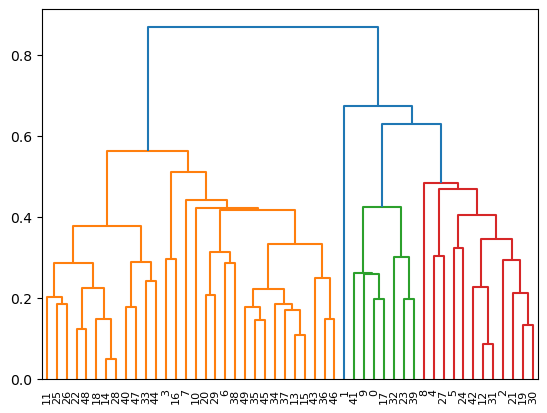

In [36]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [37]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [38]:
y_hc2 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [39]:
crime['cluster'] = y_hc2

In [40]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870000,114.433333,63.633333,15.943333
1,1,10.883333,256.916667,78.333333,32.250000
2,2,10.000000,263.000000,48.000000,44.500000
3,3,14.671429,251.285714,54.285714,21.685714


In [41]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print() 

cluster 0
The Members: Arkansas | Connecticut | Delaware | Hawaii | Idaho | Indiana | Iowa | Kansas | Kentucky | Maine | Massachusetts | Minnesota | Montana | Nebraska | New Hampshire | New Jersey | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Dakota | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming
Total Members: 30

cluster 1
The Members: Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Missouri | Nevada | New Mexico | New York | Texas
Total Members: 12

cluster 2
The Members: Alaska
Total Members: 1

cluster 3
The Members: Alabama | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee
Total Members: 7



In [42]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [45]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return x

df_norm = norm_func(crime.iloc[:, 1:])


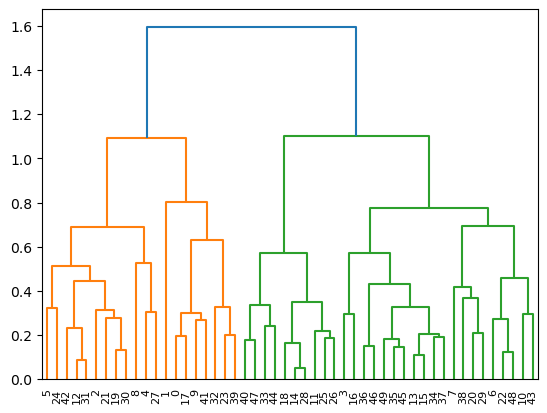

In [46]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [47]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [48]:
y_hc3 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [49]:
crime['cluster'] = y_hc3

In [50]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


In [51]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Alabama | Alaska | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee
Total Members: 8

cluster 1
The Members: Arkansas | Connecticut | Delaware | Hawaii | Indiana | Kansas | Kentucky | Massachusetts | Minnesota | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wisconsin | Wyoming
Total Members: 20

cluster 2
The Members: Idaho | Iowa | Maine | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia
Total Members: 10

cluster 3
The Members: Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Missouri | Nevada | New Mexico | New York | Texas
Total Members: 12



In [52]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [53]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

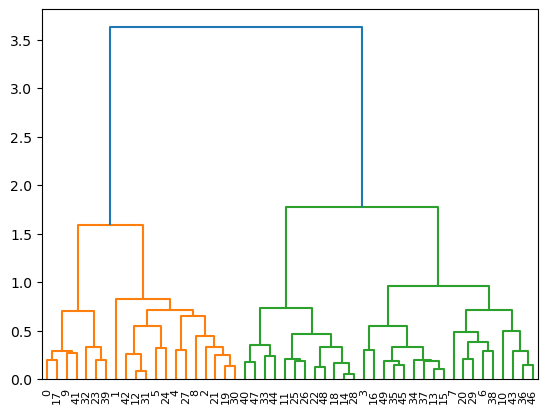

In [54]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [55]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [56]:
y_hc4 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [57]:
crime['cluster'] = y_hc4

In [58]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


In [59]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Arkansas | Connecticut | Delaware | Hawaii | Indiana | Kansas | Kentucky | Massachusetts | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wyoming
Total Members: 18

cluster 1
The Members: Alaska | Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Missouri | Nevada | New Mexico | New York | Texas
Total Members: 13

cluster 2
The Members: Idaho | Iowa | Maine | Minnesota | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia | Wisconsin
Total Members: 12

cluster 3
The Members: Alabama | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee
Total Members: 7



In [60]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [61]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

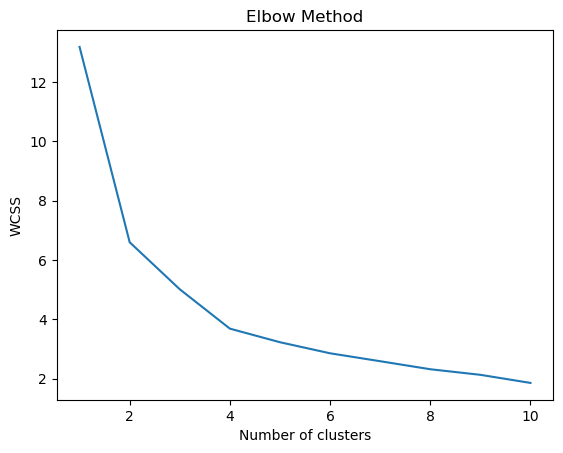

In [62]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [64]:
KM_label=clusters_new.labels_

In [65]:
crime['cluster'] = clusters_new.labels_

In [66]:
clusters_new.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [67]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.966667,264.000000,76.500000,33.608333
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.852941,141.176471,73.647059,19.335294


In [68]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Idaho | Iowa | Kentucky | Maine | Minnesota | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia | Wisconsin
Total Members: 13

cluster 1
The Members: Alaska | Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Nevada | New Mexico | New York | Texas
Total Members: 12

cluster 2
The Members: Alabama | Arkansas | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee
Total Members: 8

cluster 3
The Members: Connecticut | Delaware | Hawaii | Indiana | Kansas | Massachusetts | Missouri | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wyoming
Total Members: 17



In [69]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(df_norm)

DBSCAN(eps=0.3, min_samples=3)

In [70]:
dbscan.labels_

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [71]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl.head()

,cluster_db
0,0
1,-1
2,1
3,1
4,-1


In [72]:
crime['clust_db_scan']=cl.cluster_db

In [73]:
s1=(metrics.silhouette_score(df_norm,y_hc1))
s1

0.21033337025958493

In [74]:
s2=(metrics.silhouette_score(df_norm,y_hc2))
s2

0.3699239114027717

In [75]:
s3=(metrics.silhouette_score(df_norm,y_hc3))
s3

0.30607294424263076

In [76]:
s4=(metrics.silhouette_score(df_norm,y_hc4))
s4

0.3298707379986785

In [77]:
s5=(metrics.silhouette_score(df_norm,clusters_new.labels_))
s5

0.3408903560074363

In [78]:
s6=(metrics.silhouette_score(df_norm,cl.cluster_db))
s6

0.24738588099272632

In [79]:
t={'Model':['Single','Average','Complete','Ward','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Single,0.210333
1,Average,0.369924
2,Complete,0.306073
3,Ward,0.329871
4,Kmeans,0.340890
5,DBScan,0.247386


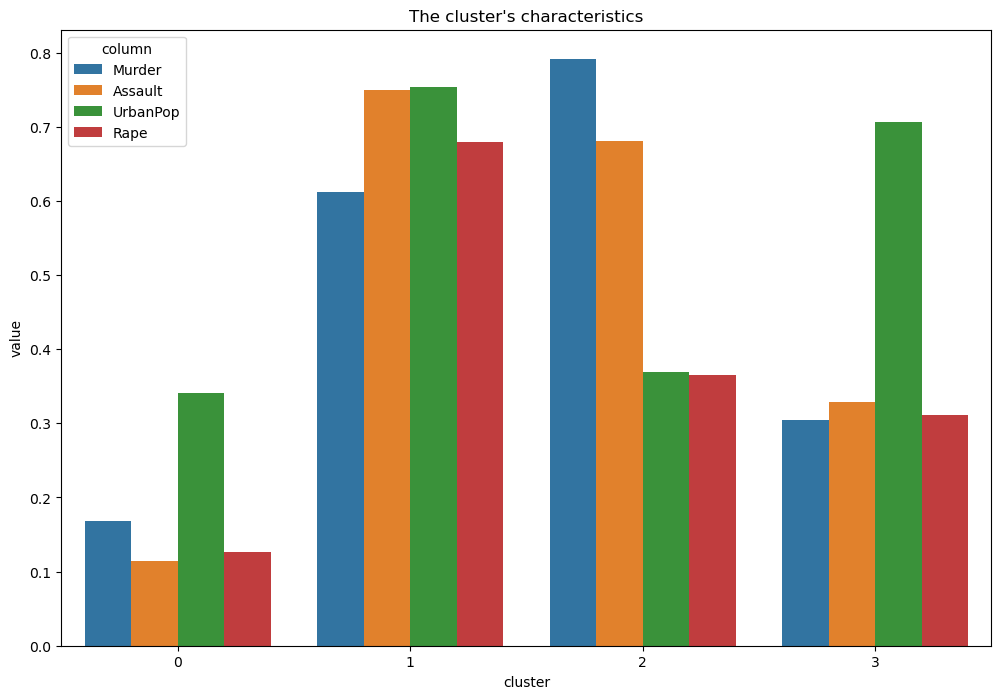

In [80]:
visualize = pd.DataFrame(clusters_new.cluster_centers_)
visualize = visualize.T
visualize['column'] = ['Murder','Assault','UrbanPop','Rape']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()